**Problem 3: Object Detection**

a)Understand the definition of object detection: (url)

b)Describe the difference between Object Localization & Object Detection?

c)Explore the ILSVRC2014 dataset (url). Understand the format of the annotations.

d)Randomly select 100 images and draw the ground truth bounding boxes along with the corresponding class label.

e)What can be the metric to validate the model predictions? You have done this before.

f)Oftentimes, the model will produce multiple detections for the same object. As a post-processing step, a non-maxima suppression algorithm selects the best box, filtering the rest. Read about non-maxima suppression here - (url). Implement the non-maxima suppression algorithm by creating random boxes by distorting a ground truth box. Visualize the best box that the non-maxima suppression algo produces

**1. Object Detection:**
Object Detection is the method of identifying and locating multiple objects within an image.

**It involves two main tasks:** 
classifying what objects are present and 
drawing bounding boxes around them to pinpoint their positions.

Object Detection is to not only recognize what objects are present but also determine their precise locations by drawing bounding boxes around them    

**2.Describe the difference between Object Localization & Object Detection:**
Object localisation is finding the location of the specific object in the image ,while image recognition is the process of categorising an entire image into predefined class or categories ie. We classify the entire images as categories.

In image recognition,unlike object localisation,instead of focussing on particular location,we concentrate on the entire image or we can say that we identify dominant object in the image

**3.Explore the ILSVRC2014 dataset:**
The ILSVRC2014 dataset is commonly known as the ImageNet Large Scale Visual Recognition Challenge 2014 dataset. It is a benchmark dataset used for object recognition tasks.It contains 200 fully labelled categories.Out Of those,we pick only 3 categories of images (n07715103-Cauliflower,n07711080-FrenchFries,n07747607-Orange)
**The format of the annotations**
The annotation is given in xml format which is pair of tags which contains information about source,it's width,it's height,image id and its label.This also contains information about the bounding box which is needed for training and evaluating object detection models


**4.Metric to validate the model predictions:**
Ground bounding box can be determined using annotation given for the corresponding image in which xmin,ymin,xmax and ymax tag nested inside bbox tag is most important which is the bounding box coordinates
Metric which can be used to validate the model prediction is IOU(Intersection Over Union) Score,which determines the overlapping between the predicted and the ground bounding box.

**5.Non-Maximum Supression:**
Non-Maximum Suppression (NMS) is a technique used in object detection to filter out redundant bounding boxes and select the most accurate ones. It ensures that each object in the image is represented by only one bounding box, reducing duplicate detections and improving the overall quality of detection results.

**Approach**

**1.Sorting by Scores:**
The bounding box scores are sorted in descending order. This sorting is crucial because it allows us to prioritize higher-scoring boxes, which are more likely to represent correct detections.

**2.Iterative Selection:** 
Starting with the box with the highest score (current_index = sorted_indices[0]), the function iteratively compares this box with others based on their Intersection over Union (IoU) scores. Boxes with IoU scores above a certain threshold (threshold) are considered redundant and filtered out.

**3.IoU Calculation:** 
The IoU score measures the overlap between two bounding boxes. It's calculated using the calculate_iou() function, which computes the intersection area divided by the union area of two boxes.

**4.Filtering Redundant Boxes:** 
Boxes with IoU scores below the threshold are considered dissimilar enough to be separate objects, so they are retained (filtered_indices). The sorted_indices list is updated to exclude these filtered boxes, ensuring that only non-redundant boxes are kept for further processing.

**5.Output:** 
The function returns a list of indices (picked_indices) corresponding to the selected non-redundant bounding boxes after NMS.

In [33]:
#Importing libraries that are needed to perform Object Detection
import os
import cv2
import xml.etree.ElementTree as ET
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [34]:
def load_annotations(xml_file):
    # Load annotations from XML file
    if not os.path.isfile(xml_file):
        print(f"Error: XML file '{xml_file}' not found.")
        return []
    #parse xml file and find its root which is annotations
    tree = ET.parse(xml_file)
    root = tree.getroot()
    boxes = []
    #In the xml file find the tag which object which is nested in the annndbox ,find value of xmin,ymin,xmax,ymax in the bndbox tag and convert it to into integer for further calculation of Bounding boxotations(root)
    for obj in root.findall('object'):
        #find the tag bndbox within the object tag
        box = obj.find('bndbox')
        """In
       bndbox ,find value of xmin,ymin,xmax,ymax in the bndbox tag 
    and convert it to into integer for further calculation of Bounding box"""
        
        xmin = int(box.find('xmin').text)
        ymin = int(box.find('ymin').text)
        xmax = int(box.find('xmax').text)
        ymax = int(box.find('ymax').text)
        boxes.append([xmin, ymin, xmax - xmin, ymax - ymin])
    return boxes


In [35]:
def apply_nms(boxes, scores, threshold):
    # Apply Non-Maxima Suppression (NMS) to filter redundant boxes
    sorted_indices = np.argsort(scores)[::-1]
    # Sort the bounding box scores in descending order

    picked_indices = []
    # Initialize a list to store indices of picked boxes

    while len(sorted_indices) > 0:
        current_index = sorted_indices[0]
        picked_indices.append(current_index)
        current_box = boxes[current_index]
        # Pick the box with the highest score and add its index to picked_indices

        iou_scores = [calculate_iou(current_box, boxes[idx]) for idx in sorted_indices[1:]]
        # Calculate IoU scores between the current box and all other boxes

        filtered_indices = np.where(np.array(iou_scores) <= threshold)[0]
        # Filter indices of boxes with IoU scores below the threshold

        sorted_indices = sorted_indices[filtered_indices + 1]
        # Update sorted_indices with non-maximum scoring boxes

    return picked_indices


In [36]:
def calculate_iou(box1, box2):
    # Calculate Intersection over Union (IoU) between two bounding boxes
    x1, y1, w1, h1 = box1  # Unpack box1 coordinates and dimensions
    x2, y2, w2, h2 = box2  # Unpack box2 coordinates and dimensions

    # Calculate coordinates of the intersection rectangle
    intersect_x1 = max(x1, x2)
    intersect_y1 = max(y1, y2)
    intersect_x2 = min(x1 + w1, x2 + w2)
    intersect_y2 = min(y1 + h1, y2 + h2)

    # Calculate area of intersection rectangle
    intersect_area = max(0, intersect_x2 - intersect_x1 + 1) * max(0, intersect_y2 - intersect_y1 + 1)

    # Calculate areas of both bounding boxes
    box1_area = (w1 + 1) * (h1 + 1)
    box2_area = (w2 + 1) * (h2 + 1)

    # Calculate IoU using the intersection area and areas of both boxes
    iou = intersect_area / float(box1_area + box2_area - intersect_area)
    return iou


In [37]:
# Define the folders containing images and annotations
image_folders = ['Dataset/n07715103', 'Dataset/n07711080', 'Dataset/n07747607']
annotation_folders = ['n07715103', 'n07711080', 'n07747607']
label_dict = {'Dataset/n07715103': 'Cauliflower', 'Dataset/n07711080': 'FrenchFries', 'Dataset/n07747607': 'Orange'}

In [38]:
# Function to fetch random images with corresponding XML files
def fetch_random_images_with_xml(image_folders, annotation_folders, total_images):
    combined_data = []
    for image_folder, annotation_folder in zip(image_folders, annotation_folders):
        image_files = os.listdir(image_folder)
        for image_file in image_files:
            annotation_file = os.path.join(annotation_folder, image_file.replace('.JPEG', '.xml'))  # Corrected file extension
            if os.path.exists(annotation_file):  # Check if corresponding XML file exists
                combined_data.append((os.path.join(image_folder, image_file), annotation_file))

    random.shuffle(combined_data)  # Shuffle the combined list
    selected_data = combined_data[:total_images]  # Select the first total_images from the shuffled list
    selected_images, selected_annotations = zip(*selected_data)

    return selected_images, selected_annotations

In [39]:
# Load random images and annotations
total_images = 10
selected_images, selected_annotations = fetch_random_images_with_xml(image_folders, annotation_folders, total_images)

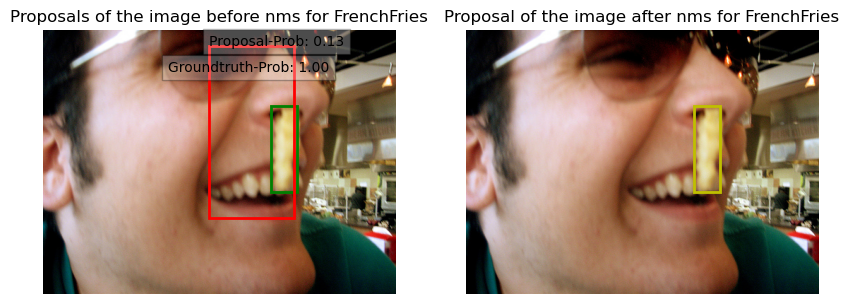

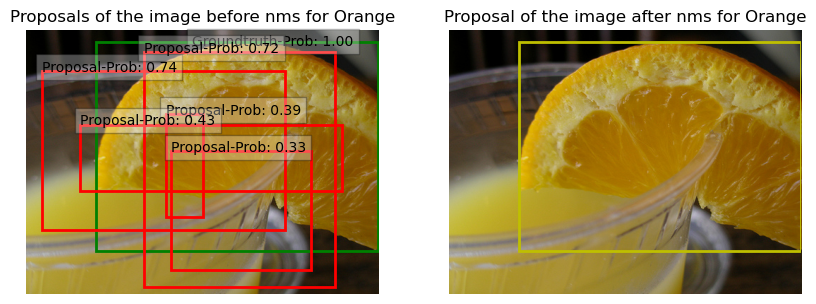

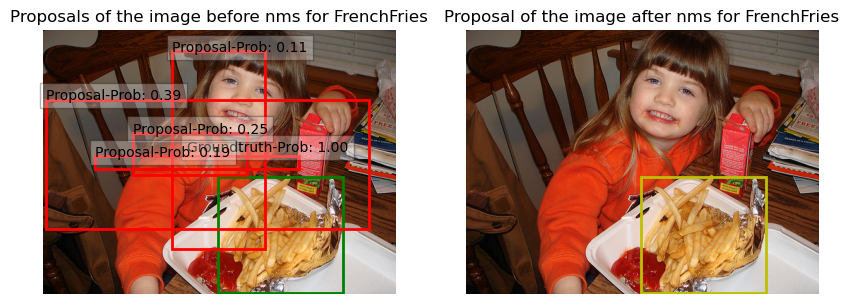

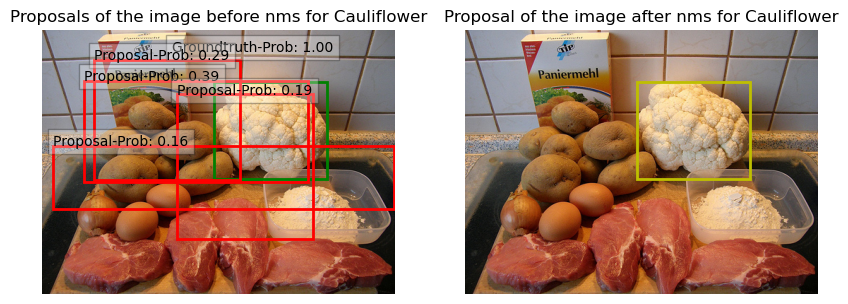

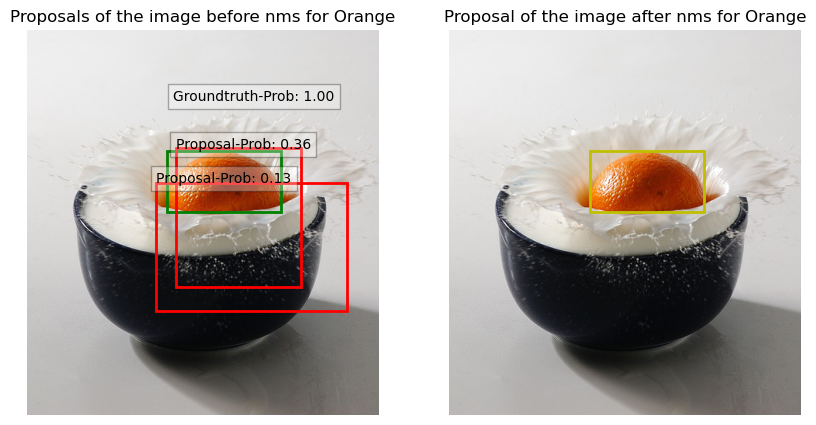

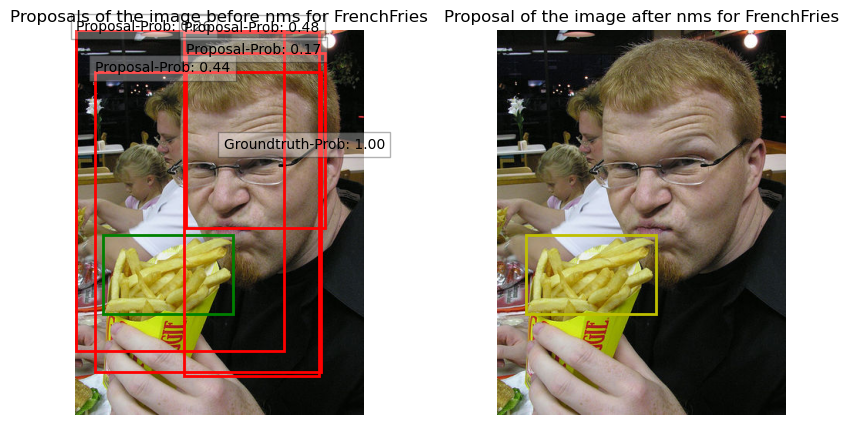

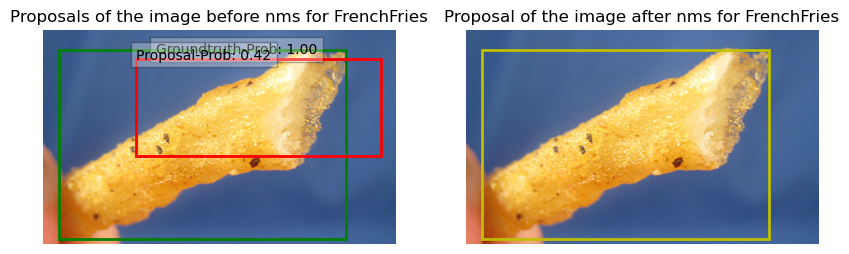

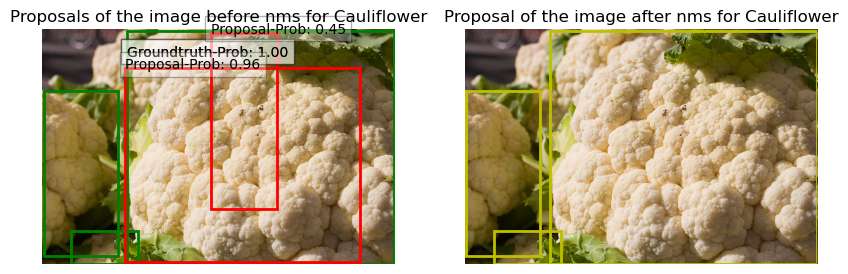

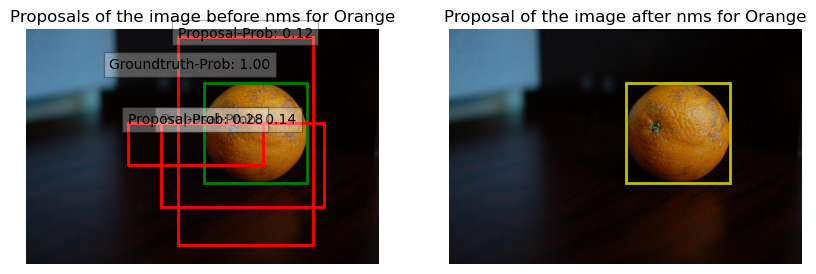

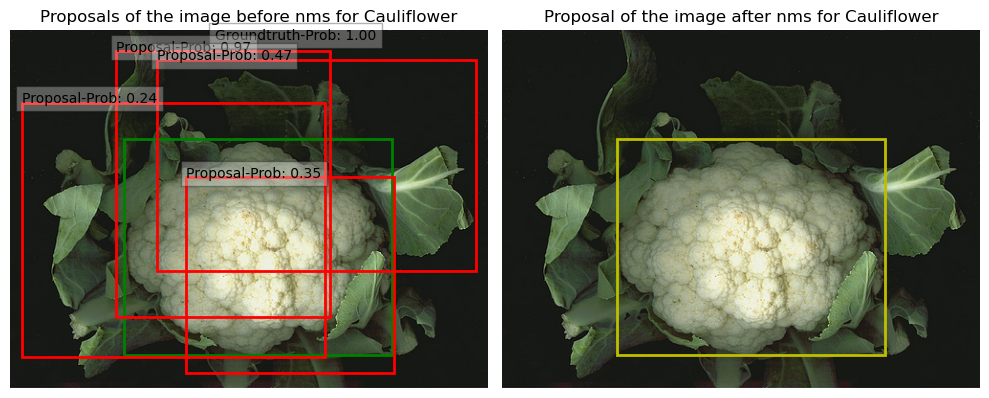

In [43]:
# Perform object detection and draw ground truth bounding boxes and proposals for each selected image
# Perform NMS and get indices of picked boxes
for idx, (img_path, xml_path) in enumerate(zip(selected_images, selected_annotations)):
    # Create a plot for each image and its proposals before and after NMS
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    # Load the image and ground truth bounding boxes
    image = cv2.imread(img_path)
    ai_boxes = load_annotations(xml_path)
    img=img_path.split('\\')
        
    label=label_dict[img[0]]

    # Draw ground truth bounding boxes
    for ai_box in ai_boxes:
        x = ai_box[0]
        y = ai_box[1]
        w = ai_box[2]
        h = ai_box[3]
        ai_rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='green', facecolor='none', fill=False)
        axs[0].add_patch(ai_rect)
        axs[0].text(xmin, ymin, f'Groundtruth-Prob: 1.00', bbox=dict(facecolor='white', alpha=0.3))
        
    # Draw proposals before NMS
    prop_boxes = []
    for idx in range(random.randint(1, 5)):  # Simulate 1 to 5 proposals of bounding boxes
        xmin = random.randint(0, image.shape[1] // 2)
        ymin = random.randint(0, image.shape[0] // 2)
        xmax = random.randint(image.shape[1] // 2, image.shape[1])
        ymax = random.randint(image.shape[0] // 2, image.shape[0])
        prob = random.uniform(0.7,1.0) if calculate_iou([xmin, ymin, xmax, ymax], ai_boxes[0][:4]) > 0.5 else random.uniform(0.1,0.5)
        prop_boxes.append([xmin, ymin, xmax, ymax, prob])
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none', fill=False)
        axs[0].add_patch(rect)
        axs[0].text(xmin, ymin, f'Proposal-Prob: {prob:.2f}', bbox=dict(facecolor='white', alpha=0.3))

    # Display the images with AI-generated bounding boxes and proposals before NMS
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axs[0].imshow(image_rgb)
    axs[0].set_title(f"Proposals of the image before NMS for {label}")
    axs[0].axis('off')
    
    # Perform NMS and get the indices of picked boxes
    picked_indices = apply_nms(ai_boxes, np.random.rand(len(ai_boxes)), 0.5)  # Example scores and threshold

    # Draw proposals after NMS
    for idx, box in enumerate(ai_boxes):
        rect = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth=2, edgecolor='y' if idx in picked_indices else 'g', facecolor='none', fill=False)
        axs[1].add_patch(rect)

    # Display the images with proposals after NMS
    axs[1].imshow(image_rgb)
    axs[1].set_title(f"Proposals of the image after NMS for {label}")
    axs[1].axis('off')

# Show the plot with images
plt.tight_layout()
plt.show()
